# Analyzing Geiger Counter Data

<p>This python script is designed for the AWARE RM-60 <i>Micro Roentgen Radiation Monitor</i> though it should work with data from other counters.</p>
<p>The RM-60 is connected to and powered by an Arduino Uno.</p>
<p>The Arduino code is an interrupt driven counter that for each count outputs the time since the previous count. The data are in seconds. My script that reads the RM-60 saves there time differences to the data file. It also outputs the counts per minute once a minute, along with the cumulative average CPM. This data starts with a <tt>#</tt> character so it can be filtered out as a comment. </p>
<p>This script reads the data files from disk and puts the arrival time differences into a <tt>numpy</tt> array. Right now the script prints out the files with the suffix <tt>.csv</tt>. Right now there is a maximum of 200000 data points.</p>

In [9]:
%matplotlib inline

In [1]:
import matplotlib.pylab as plt
import numpy as np
import glob
fileList = glob.glob('*.csv')
fileList.sort()
for (i,fileName) in enumerate(fileList):
    print "%d - %s" % (i, fileName)
iFile = int(raw_input("Enter the number of the data file: "))
fileName = fileList[iFile]

0 - 102.csv
1 - 122.csv
2 - 142.csv
3 - 162.csv
4 - 22.csv
5 - 2mm.csv
6 - 42.csv
7 - 62.csv
8 - 82.csv
9 - RM60-201802201527.csv
10 - instruct.csv


Enter the number of the data file:  1

In [2]:
fpData = open(fileName, 'r')
dataArray = np.genfromtxt(fileName, dtype=type(0.), comments='#')
fpData.close()
nPoints = len(dataArray)
print "Read %d arrival time intervals" % (nPoints)

Read 995 arrival time intervals


<p>Now print out some information about the data.</p>
<p>There often seems to be a very rogue data point. Try to edit those out.</p>

In [8]:
avg0 = np.average(dataArray)
print "The average is: ", avg0

The average is:  0.666677488442


In [9]:
nPoints =  len(dataArray)
med = np.median(dataArray)
print "The median is: ", med

The median is:  0.430046


In [11]:
std0 = np.std(dataArray)
print "The standard deviation is: ", std0

The standard deviation is:  0.677830875697


In [12]:
print "Now there are %d data points" %(nPoints)

Now there are 995 data points


In [14]:
print "The data range is from %.3f to %.3f" % (np.min(dataArray), np.max(dataArray))
print "The average and standard deviation are %.5f +/- %.5f" % (avg0, std0)
print "The standard deviation of the mean is %.5f" % (np.std(dataArray)/np.sqrt(nPoints))
print "The median of the data is %.3f" % (np.median(dataArray))
print "Average Counts per Minute = %f" % (60.0 / np.average(dataArray))
print "There were %d zero intervals" % (len(np.where(dataArray < 0.001)[0]))

The data range is from 0.003 to 4.711
The average and standard deviation are 0.66668 +/- 0.67783
The standard deviation of the mean is 0.02149
The median of the data is 0.430
Average Counts per Minute = 89.998539
There were 0 zero intervals


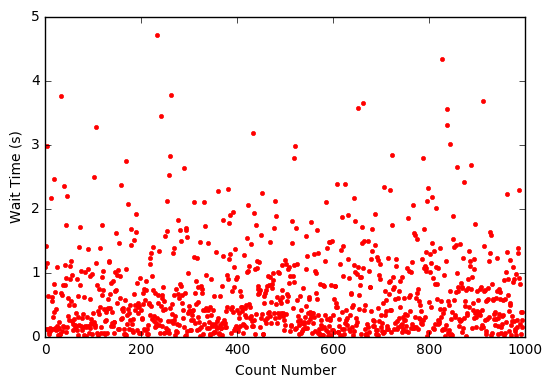

In [15]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(dataArray, 'r.')
ax.set_xlabel("Count Number")
ax.set_ylabel("Wait Time (s)")

iBad[0] =  []
There are 1 suspicious points
The median is:  0.430046
0.666677488442
Now there are 995 data points
Here are the first 20 data points:
[ 1.082612  0.11592   1.417281  1.145258  2.981797  0.118352  0.639712
  0.077353  0.043021  0.132457  0.088408  2.162083  0.114384  0.54984
  0.623566  0.299211  0.118747  2.462249  0.827654  0.385706]
The data range is from 0.003 to 4.711
The average and standard deviation are 0.66668 +/- 0.67783
The standard deviation of the mean is 0.02149
The median of the data is 0.430
Average Counts per Minute = 89.998539
There were 0 zero intervals


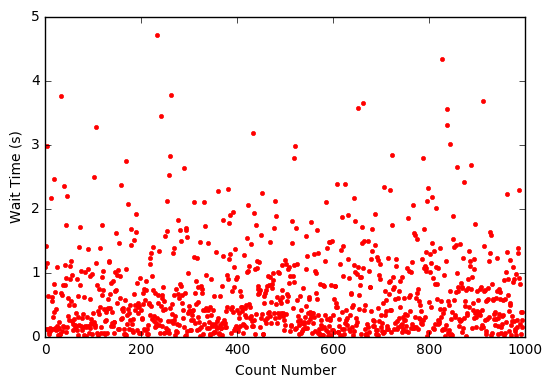

In [16]:
avg0 = np.average(dataArray)
iBad = np.where(dataArray > 20*avg0)
print "iBad[0] = ", iBad[0]
print "There are %d suspicious points" % (len(iBad))
dataArray = np.delete(dataArray, iBad)
nPoints =  len(dataArray)
med = np.median(dataArray)
print "The median is: ", med
print avg0
std0 = np.std(dataArray)
print "Now there are %d data points" %(nPoints)
print "Here are the first 20 data points:\n", dataArray[:20]
print "The data range is from %.3f to %.3f" % (np.min(dataArray), np.max(dataArray))
print "The average and standard deviation are %.5f +/- %.5f" % (avg0, std0)
print "The standard deviation of the mean is %.5f" % (np.std(dataArray)/np.sqrt(nPoints))
print "The median of the data is %.3f" % (np.median(dataArray))
print "Average Counts per Minute = %f" % (60.0 / np.average(dataArray))
print "There were %d zero intervals" % (len(np.where(dataArray < 0.001)[0]))
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(dataArray, 'r.')
ax.set_xlabel("Count Number")
ax.set_ylabel("Wait Time (s)")

<p>Finally plot the histogram on a linear and a logarithmic scale.</p>

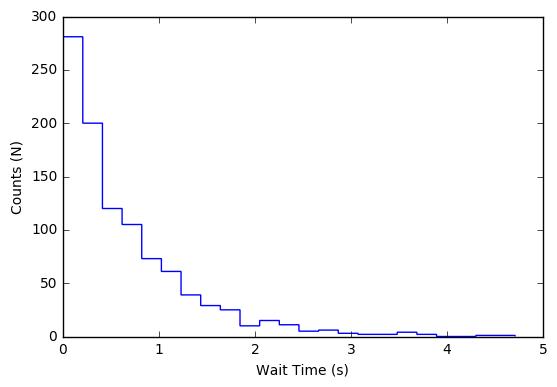

In [17]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,23,histtype='step', log=False)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")


(1, 100)

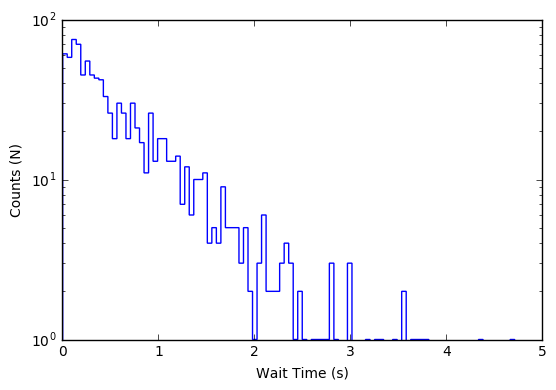

In [18]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,100,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")
ax.set_ylim(1,100)

width =  0.238184944104
Using 19 bins


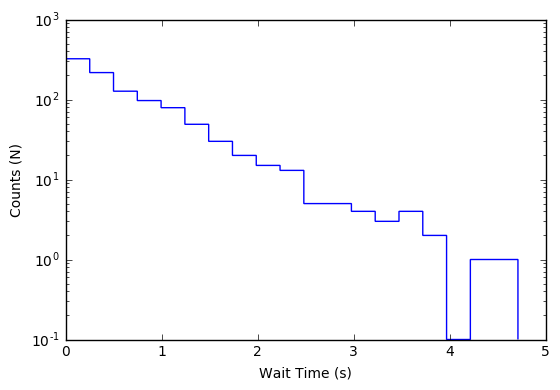

In [19]:
width = 3.5 * std0 / nPoints**(.333)
print "width = ", width
nBins = int(np.max(dataArray) / width)
print "Using %d bins" % (nBins)
bins = np.arange(0, np.max(dataArray), width)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
histOut = plt.hist(dataArray,nBins,histtype='step', log=True)
ax.set_xlabel("Wait Time (s)")
ax.set_ylabel("Counts (N)")

In [41]:
npts = []
avgs = []
stds = []
distances = []
files = glob.glob('*.csv')
for dataFile in files:
    print dataFile
    data = np.genfromtxt(dataFile, comments = '#')
    npts.append(len(data))
    avg = np.average(data)
    avgs.append(avg)
    stds.append(np.std(data))
    distances.append(dataFile)
avgs = np.array(avgs)
stds = np.array(stds)
unAvgs = stds/np.sqrt(npts)
r = []
for dist in distances:
    r.append(float(dist.split(',')[0]))

142.csv
102.csv
62.csv
22.csv
2.csv
162.csv
82.csv
122.csv
42.csv


ValueError: invalid literal for float(): 142.csv

In [31]:
model(Io)= (Io + r**2)+ 4.3
defmodel(params, r)
I0 = params[0]
return I0/(r**2 + 4.3)

SyntaxError: can't assign to function call (<ipython-input-31-c1dadf6b4163>, line 1)